In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px

# Define the tickers
tickers = {
    'Bitcoin': 'BTC-USD',
}

# Download historical data for the tickers
data = yf.download(
    tickers=list(tickers.values()),
    period='max',       # Adjust the period as needed # Adjust the period as needed '6mo' '1d' 'max'
    interval='1d',     # Data interval Data interval '1m' '1h' '1d'       #best is w max and 1d so far 
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

btc = data

#Flattening the multi-level columns
btc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc.columns]

# Renaming the columns to remove prefixes and simplify names
new_column_names = {
    'Date': 'Date',
    'BTC-USD_Open': 'Open',
    'BTC-USD_High': 'High',
    'BTC-USD_Low': 'Low',
    'BTC-USD_Close': 'Close',
    'BTC-USD_Volume': 'Volume'
}
btc.rename(columns=new_column_names, inplace=True)

# Reset the index, which moves the date from the index to a column
btc.reset_index(inplace=True)

print(btc)

# Step 1: Extract Bitcoin Volume before dropping columns
print(btc['Volume'].eq(0).sum())
print(btc)

[*********************100%***********************]  1 of 1 completed

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3726 2024-11-29 00:00:00+00:00  95653.953125  98693.171875  95407.882812   
3727 2024-11-30 00:00:00+00:00  97468.812500  97499.343750  96144.218750   
3728 2024-12-01 00:00:00+00:00  96461.335938  97888.125000  95770.187500   
3729 2024-12-02 00:00:00+00:00  97276.007812  98152.601562  94482.867188   
3730 2024-12-03 00:00:00+00:00  95855.929688  96263.234375  93645.632812   

             Close       Volume  
0       457.334015     21056800  
1       424.440002 

In [ ]:
if 'Datetime' in btc.columns:
    btc.rename(columns={'Datetime': 'Date'}, inplace=True)
    btc = btc.drop(columns="Volume")

print(btc)

# Perform min-max normalization for each asset
normalized_prices = btc.copy() 

# Exclude the 'Date' column during normalization
for col in normalized_prices.columns[1:]:
    min_price = normalized_prices[col].min()
    max_price = normalized_prices[col].max()
    normalized_prices[col] = ((normalized_prices[col] - min_price) / (max_price - min_price)) * 100

# Melt the DataFrame to long format
normalized_prices_melted = normalized_prices.melt(id_vars='Date', var_name='Asset', value_name='Normalized Price')

# Create the line plot
fig = px.line(
    normalized_prices_melted,
    x='Date',
    y='Normalized Price',
    color='Asset',
    labels={'Normalized Price': 'Normalized Price (0% = Min, 100% = Max)', 'Date': 'Date', 'Asset': 'Asset'},
    title='Min-Max Normalized Closing Prices for Selected Assets Over Time'
)

# Show the plot
fig.show()
btc.rename(columns={'Close': 'Bitcoin Close'}, inplace=True)
print(btc)

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3726 2024-11-29 00:00:00+00:00  95653.953125  98693.171875  95407.882812   
3727 2024-11-30 00:00:00+00:00  97468.812500  97499.343750  96144.218750   
3728 2024-12-01 00:00:00+00:00  96461.335938  97888.125000  95770.187500   
3729 2024-12-02 00:00:00+00:00  97276.007812  98152.601562  94482.867188   
3730 2024-12-03 00:00:00+00:00  95855.929688  96263.234375  93645.632812   

             Close       Volume  
0       457.334015     21056800  
1       424.440002 

                          Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3726 2024-11-29 00:00:00+00:00  95653.953125  98693.171875  95407.882812   
3727 2024-11-30 00:00:00+00:00  97468.812500  97499.343750  96144.218750   
3728 2024-12-01 00:00:00+00:00  96461.335938  97888.125000  95770.187500   
3729 2024-12-02 00:00:00+00:00  97276.007812  98152.601562  94482.867188   
3730 2024-12-03 00:00:00+00:00  95855.929688  96263.234375  93645.632812   

      Bitcoin Close       Volume  
0        457.334015     21056800  
1        424.4400

In [5]:
import pandas as pd
import os

def clean_sentiment_score(score):
    """Remove leading single quote from sentiment score if present"""
    if isinstance(score, str) and score.startswith("'"):
        return float(score.lstrip("'"))
    return float(score)

# Read the sentiment file
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'combined_crypto_analysis.csv')
sentiment_df = pd.read_csv(file_path)

# Process and merge the data
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.tz_localize('UTC')
sentiment_df['sentiment_score'] = sentiment_df['avg_sentiment'].apply(clean_sentiment_score)
btc['Date'] = pd.to_datetime(btc['Date'])

# Merge and update btc DataFrame
btc = btc.merge(sentiment_df[['Date', 'sentiment_score']], on='Date', how='left')

print(f"Merged shape: {btc.shape}, Rows with sentiment: {btc['sentiment_score'].notna().sum()}")

Merged shape: (3731, 7), Rows with sentiment: 3729


           BB_upper      BB_lower      KC_upper      KC_lower  squeeze
3721  105188.117350  69930.249838  94423.615182  82747.397213        0
3722  104289.236964  73203.403661  95095.900371  82935.453106        0
3723  103874.813676  75252.451168  95159.934506  83437.065366        0
3724  103601.815315  77531.216716  96028.590679  83837.748491        0
3725  102929.516728  80114.214522  96600.949118  84354.780368        0
3726  101899.431944  83212.564931  97425.532908  84860.417283        0
3727  100909.450658  85800.032936  97664.333782  85632.298235        0
3728  101198.770321  86368.543741  97660.416112  86708.877440        0
3729  101113.637747  87244.625534  97926.052031  87144.319218        0
3730  101231.093276  87685.502037  97929.998722  87832.238956        0
Rescaled Data:
          Open      High       Low  Bitcoin Close    Volume  sentiment_score  \
0    -0.877556 -0.878261 -0.876897      -0.877711 -0.918440        -0.518772   
1    -0.877983 -0.878785 -0.878805      -0.8

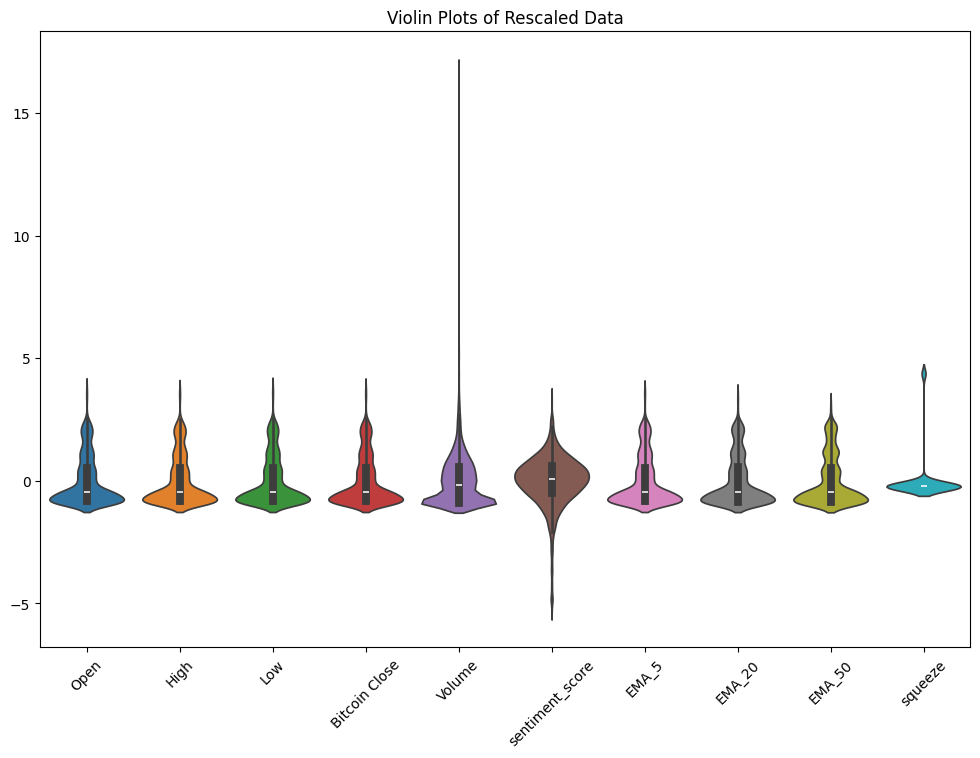

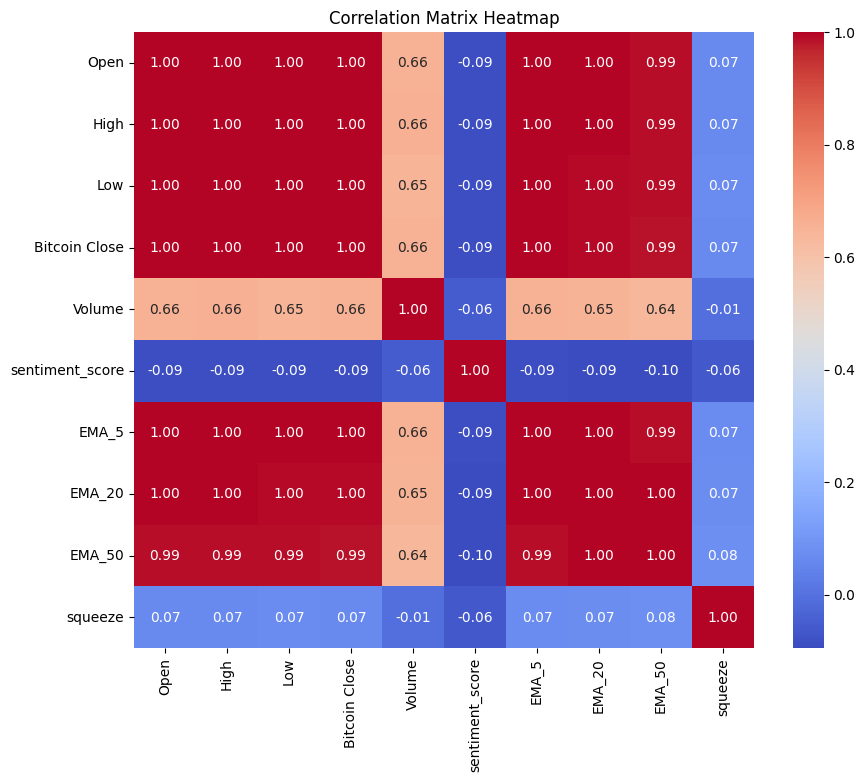

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

btc['EMA_5'] = btc['Bitcoin Close'].ewm(span=5, adjust=False).mean()
btc['EMA_20'] = btc['Bitcoin Close'].ewm(span=20, adjust=False).mean()
btc['EMA_50'] = btc['Bitcoin Close'].ewm(span=50, adjust=False).mean()

# Parameters
bb_length = 20
bb_std_dev = 2
kc_length = 20
kc_multiplier = 1.5

# Calculate Bollinger Bands
rolling_mean = btc['Bitcoin Close'].rolling(window=bb_length).mean()
rolling_std = btc['Bitcoin Close'].rolling(window=bb_length).std()
btc['BB_upper'] = rolling_mean + (bb_std_dev * rolling_std)
btc['BB_lower'] = rolling_mean - (bb_std_dev * rolling_std)

# Calculate True Range and Average True Range for Keltner Channels
true_range = np.maximum(
    btc['High'] - btc['Low'],
    np.maximum(abs(btc['High'] - btc['Bitcoin Close'].shift(1)),
               abs(btc['Low'] - btc['Bitcoin Close'].shift(1)))
)
average_true_range = true_range.rolling(window=kc_length).mean()
keltner_middle = btc['Bitcoin Close'].ewm(span=kc_length, adjust=False).mean()
btc['KC_upper'] = keltner_middle + (kc_multiplier * average_true_range)
btc['KC_lower'] = keltner_middle - (kc_multiplier * average_true_range)

# Define squeeze condition
btc['squeeze'] = np.where(
    (btc['BB_lower'] > btc['KC_lower']) & (btc['BB_upper'] < btc['KC_upper']),
    1,  # Squeeze is on
    0   # Squeeze is off
)

# Check intermediate values
print(btc[['BB_upper', 'BB_lower', 'KC_upper', 'KC_lower', 'squeeze']].tail(10))
btc.drop(columns=['BB_upper', 'BB_lower', 'KC_upper', 'KC_lower'], inplace=True)

def global_rescale(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    # Avoid division by zero if data has zero variance
    if std_val == 0:
        rescaled_data = np.zeros_like(data)
    else:
        rescaled_data = (data - mean_val) / std_val
    return rescaled_data

if 'Date' in btc.columns:
    btc = btc.drop(columns='Date')
# Apply the global_rescale function to each column
rescaled_data = btc.apply(global_rescale) 

rescaled_data.dropna(inplace=True)

print("Rescaled Data:")
print(rescaled_data)

# Compute basic statistics for each column
stats = rescaled_data.describe()

# Print the statistics
print("\nBasic Statistical Summary:")
print(stats)

# Plot violin plots for each column
plt.figure(figsize=(12, 8))
sns.violinplot(data=rescaled_data)
plt.title('Violin Plots of Rescaled Data')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
corr_matrix = rescaled_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import numpy as np
import pandas as pd
from torch import nn
from skorch import NeuralNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

print(rescaled_data)

test_size = 0.2
split_index = int(len(rescaled_data) * (1 - test_size))

X_train, X_test = rescaled_data.iloc[:split_index, :], rescaled_data.iloc[split_index:, :]
y_train, y_test = rescaled_data['Bitcoin Close'][:split_index], rescaled_data['Bitcoin Close'][split_index:]

print("another set")
print(X_train)
print("another set")
print(y_train)
print("another set")
print(X_test)
print("another set")
print(y_test)



          Open      High       Low  Bitcoin Close    Volume  sentiment_score  \
0    -0.877556 -0.878261 -0.876897      -0.877711 -0.918440        -0.518772   
1    -0.877983 -0.878785 -0.878805      -0.879268 -0.917762        -0.763405   
2    -0.879537 -0.880132 -0.880192      -0.880672 -0.917589        -0.300817   
3    -0.880932 -0.880343 -0.879932      -0.880004 -0.917642        -0.374637   
4    -0.880296 -0.880847 -0.879772      -0.880481 -0.918161        -0.374637   
...        ...       ...       ...            ...       ...              ...   
3724  3.462465  3.616975  3.554491       3.644411  2.670715        -0.034254   
3725  3.651067  3.583990  3.695142       3.629730  1.718142         0.660815   
3726  3.636793  3.678771  3.730590       3.715387  1.854854         1.292908   
3727  3.722863  3.623385  3.766319       3.667447  0.677127         2.324422   
3728  3.675083  3.641422  3.748170       3.706782  0.927288         1.694292   

         EMA_5    EMA_20    EMA_50  squ

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
from skorch.callbacks import EpochScoring

# Create sequences for LSTM
def create_sequences(data, target, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:(i + seq_length)].to_numpy())
        y.append(target.iloc[i + seq_length])
    return np.array(X), np.array(y)

print("y_train")
print(y_train.describe())
print("y_test")
print(y_test.describe())

# Creating sequences with a length of 10 time steps
seq_length = 5
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("y_test_seq")
print(y_test_seq)

# Convert to torch tensors
X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).reshape(-1, 1)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).reshape(-1, 1)

class MyLSTMModule(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, nonlin=nn.ReLU()):
        super().__init__()
        # Define an LSTM layer instead of a simple RNN
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.nonlin = nonlin
        self.fc = nn.Linear(hidden_size, 1) 

    def forward(self, X):
        # Forward pass through LSTM
        out, _ = self.lstm(X) 
        out = out[:, -1, :]  
        out = self.nonlin(out)  
        out = self.fc(out)  
        return out

net = NeuralNetRegressor(
    MyLSTMModule,
    module__input_size=X_train_seq.shape[2], 
    module__hidden_size=32,
    module__num_layers=1,
    module__nonlin=torch.nn.ReLU(),
    max_epochs=20,
    lr=0.01,
    batch_size=256,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.MSELoss,
)

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

#in use
params = {
    'lr': [.05,0.01,.005],
    'max_epochs': [50],
    'module__hidden_size': [32,64,128],
    'module__num_layers': [1,2,3],
    'batch_size': [64,128,256],
    'optimizer': [torch.optim.Adam, torch.optim.SGD, torch.optim.RMSprop],
    'module__nonlin': [torch.nn.ReLU(), torch.nn.Sigmoid(), torch.nn.Tanh(), torch.nn.LeakyReLU()],
} 

gs = GridSearchCV(net, params, refit=True, cv=10, scoring='neg_mean_squared_error', verbose=2)

# Fit the model
print('Sample X_train sequences:')
for i in range(min(5, len(X_train_seq))):
    print(f'X_train_seq[{i}]: {X_train_seq[i]}')
print('Sample y_train sequences:')
for i in range(min(5, len(y_train_seq))):
    print(f'y_train_seq[{i}]: {y_train_seq[i]}')

print("y_test_seq")
print(y_test_seq)
gs.fit(X_train_seq, y_train_seq)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))
#best score: -0.092, best params: {'batch_size': 64, 'lr': 0.01, 'max_epochs': 50, 'module__hidden_size': 32, 'module__nonlin': ReLU(), 'module__num_layers': 1, 'optimizer': <class 'torch.optim.adam.Adam'>}



Test MSE: 0.03
Test R2: 0.97


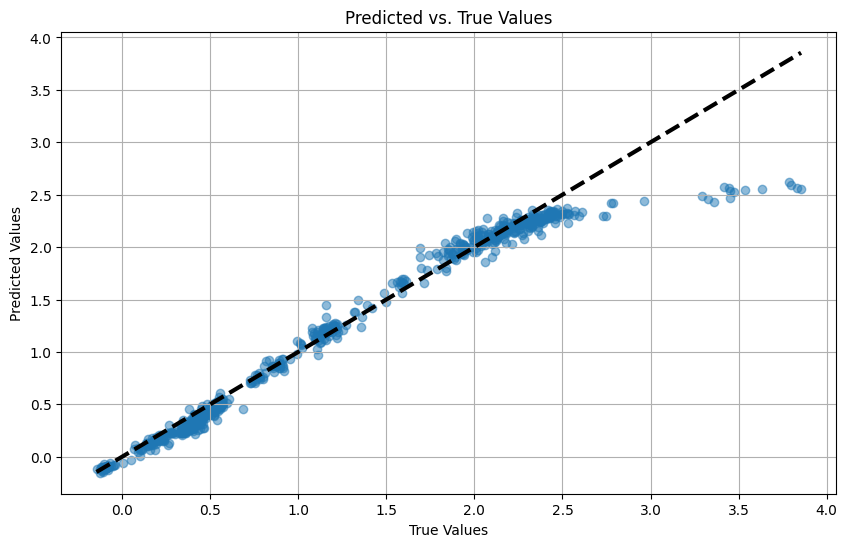

[{'batches': [{'train_loss': 0.8513926267623901, 'train_batch_size': 64}, {'train_loss': 0.7206476926803589, 'train_batch_size': 64}, {'train_loss': 0.5289060473442078, 'train_batch_size': 64}, {'train_loss': 0.3821731209754944, 'train_batch_size': 64}, {'train_loss': 0.2435997873544693, 'train_batch_size': 64}, {'train_loss': 0.13132187724113464, 'train_batch_size': 64}, {'train_loss': 0.045805998146533966, 'train_batch_size': 64}, {'train_loss': 0.005062417592853308, 'train_batch_size': 64}, {'train_loss': 0.0029767139349132776, 'train_batch_size': 64}, {'train_loss': 0.02544797584414482, 'train_batch_size': 64}, {'train_loss': 0.0355837456882, 'train_batch_size': 64}, {'train_loss': 0.06857524067163467, 'train_batch_size': 64}, {'train_loss': 0.0751209557056427, 'train_batch_size': 64}, {'train_loss': 0.07213498651981354, 'train_batch_size': 64}, {'train_loss': 0.06084092706441879, 'train_batch_size': 64}, {'train_loss': 0.059691328555345535, 'train_batch_size': 64}, {'train_loss': 

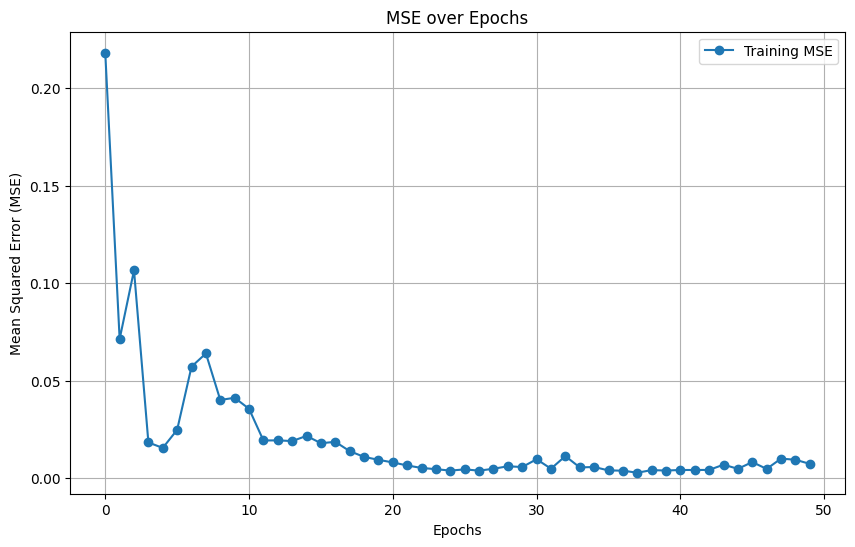

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# Evaluate the model on the test set
net = gs.best_estimator_

# Get predictions on the test data
y_pred_test = net.predict(X_test_seq)

# Calculate the R2 score and MSE for the test data
test_mse = mean_squared_error(y_test_seq, y_pred_test)
test_r2 = r2_score(y_test_seq, y_pred_test)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R2: {test_r2:.2f}")

# Detach tensors and convert to numpy arrays if needed
y_pred_test = y_pred_test if isinstance(y_pred_test, np.ndarray) else y_pred_test.detach().numpy()
y_test_seq = y_test_seq if isinstance(y_test_seq, np.ndarray) else y_test_seq.detach().numpy()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, y_pred_test, alpha=0.5)
plt.title('Predicted vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_seq.min(), y_test_seq.max()], [y_test_seq.min(), y_test_seq.max()], 'k--', lw=3)  # Line showing perfect predictions
plt.grid(True)
plt.show()

print(net.history)

history = net.history

# Extract training and validation MSE from the history
train_mse = [h['train_loss'] for h in history]
valid_mse = [h['valid_loss'] for h in history if 'valid_loss' in h]

plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE', marker='o')
#plt.plot(valid_mse, label='Validation MSE', marker='o')
plt.title('MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()